In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [87]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [88]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [89]:
df.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

In [90]:
col_name_reorder=['Time','Amount','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Class']

In [91]:
df=df[col_name_reorder]

In [110]:
df.columns.values

array(['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class', 'bin_var'], dtype=object)

In [111]:
#df=df.drop('bin_var',axis=1)

In [112]:
df.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.0,149.62,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,0.0,2.69,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.0,378.66,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.0,123.50,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,2.0,69.99,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [113]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

In [114]:
# If Categorial Data - Categorial_Data_columns =[] which would be added to Total Columns
continuous_column=['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class']
total_columns = continuous_column # + Categorial_Data_columns
def IV_calc(data,var): 
    if data[var].dtypes == "object": 
        dataf = data.groupby([var])['Class'].agg(['count','sum']) 
        dataf.columns = ["Total","bad"] 
        dataf["good"] = dataf["Total"] - dataf["bad"] 
        dataf["bad_per"] = dataf["bad"]/dataf["bad"].sum()
        dataf["good_per"] = dataf["good"]/dataf["good"].sum() 
        dataf["I_V"] = (dataf["good_per"] - dataf["bad_per"]) * np.log(dataf["good_per"]/dataf["bad_per"]) 
        return dataf 
    else: 
        data['bin_var'] = pd.qcut(data[var].rank(method='first'),10)
        dataf = data.groupby(['bin_var'])['Class'].agg(['count','sum']) 
        dataf.columns = ["Total","bad"] 
        dataf["good"] = dataf["Total"] - dataf["bad"] 
        dataf["bad_per"] = dataf["bad"]/dataf["bad"].sum() 
        dataf["good_per"] = dataf["good"]/dataf["good"].sum() 
        dataf["I_V"] = (dataf["good_per"] - dataf["bad_per"]) * np.log(dataf["good_per"]/dataf["bad_per"]) 
        return dataf 
Iv_list = [] 
for col in total_columns: 
    assigned_data = IV_calc(data = df,var = col)
    iv_val = round(assigned_data["I_V"].sum(),3) 
    dt_type = df[col].dtypes
    Iv_list.append((iv_val,col,dt_type))
Iv_list = sorted(Iv_list,reverse = True)
for i in range(len(Iv_list)): 
        print (Iv_list[i][0],",",Iv_list[i][1],",type =",Iv_list[i][2])


inf , V4 ,type = float64
inf , Class ,type = int64
3.78 , V14 ,type = float64
3.211 , V12 ,type = float64
3.052 , V17 ,type = float64
2.968 , V10 ,type = float64
2.869 , V11 ,type = float64
2.742 , V3 ,type = float64
2.521 , V16 ,type = float64
2.274 , V7 ,type = float64
2.195 , V2 ,type = float64
1.859 , V21 ,type = float64
1.783 , V9 ,type = float64
1.657 , V27 ,type = float64
1.527 , V1 ,type = float64
1.426 , V18 ,type = float64
1.353 , V28 ,type = float64
1.232 , V6 ,type = float64
1.059 , V8 ,type = float64
1.058 , V5 ,type = float64
0.848 , V20 ,type = float64
0.811 , V19 ,type = float64
0.683 , Amount ,type = float64
0.476 , V23 ,type = float64
0.244 , Time ,type = float64
0.157 , V26 ,type = float64
0.154 , V24 ,type = float64
0.108 , V25 ,type = float64
0.073 , V13 ,type = float64
0.065 , V15 ,type = float64
0.048 , V22 ,type = float64


*In the following output, all the variables with an information value are shown in descending order. After the information value, variable name, and the type of the variable have also been shown. If the type is object, this means that it is a categorical variable; similarly, if type is float64 this means it is a 64-bit float value. We will be considering the top XX variables for the next stage of analysis.*

In [115]:
Unsacled_data=df.iloc[:,0:30]

In [118]:
df.columns.values

array(['Time', 'Amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'], dtype=object)

In [117]:
df=df.drop('bin_var',axis=1)

In [119]:
# Slipting the dependent variable(X) and Independent Variables(y)
X=df.iloc[:,0:30].values
y=df.iloc[:,-1].values

In [120]:
print(X.shape,y.shape)

(284807, 30) (284807,)


In [121]:
# Balancing the sample dataset
from imblearn.under_sampling import NearMiss
from collections import Counter
NM=NearMiss()
X_res,y_res=NM.fit_sample(X,y)
print('Original dataset shape{}'.format(Counter(y)))
print('Resample dataset shape{}'.format(Counter(y_res)))
X_res.shape,y_res.shape

Original dataset shapeCounter({0: 284315, 1: 492})
Resample dataset shapeCounter({0: 492, 1: 492})


((984, 30), (984,))

# Split Data in train and test after doing DownSampling using NearMiss function
# then we will Scale the data/Normalize the data

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [128]:
x=sm.add_constant(X_train)
reg_log=sm.Logit(y_train,x)
r_log=reg_log.fit()
print ("\n \n",r_log.summary())

Optimization terminated successfully.
         Current function value: 0.081358
         Iterations 29

 
                            Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  787
Model:                          Logit   Df Residuals:                      756
Method:                           MLE   Df Model:                           30
Date:                Tue, 05 May 2020   Pseudo R-squ.:                  0.8826
Time:                        13:02:25   Log-Likelihood:                -64.029
converged:                       True   LL-Null:                       -545.51
Covariance Type:            nonrobust   LLR p-value:                3.353e-183
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6151.7392        nan        nan        nan         nan         nan
x1            -1.2237   

In [129]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [130]:
Train_Accuracy=accuracy_score(y_train,y_pred)
Train_Accuracy

0.9606099110546379

In [131]:
Test_Accuracy=accuracy_score(y_test,y_pred_test)
Test_Accuracy

0.949238578680203

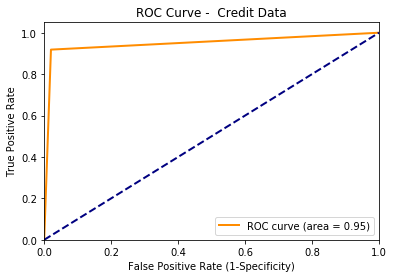

In [132]:
from sklearn import metrics 
from sklearn.metrics import auc 
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_test, pos_label=1)
roc_auc = auc(fpr,tpr) 
plt.figure() 
lw = 2 
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate (1-Specificity)') 
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -  Credit Data') 
plt.legend(loc="lower right")

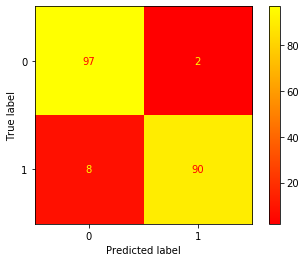

In [133]:
class_names=np.unique(y_res)
class_names
plot_confusion_matrix(model,X_test,y_test,
                     display_labels=class_names,
                     cmap=plt.cm.autumn);

In [134]:
model.intercept_

array([3.68647134])

In [135]:
model.coef_

array([[-0.54436809,  2.67938252,  0.27033852, -0.5701573 , -0.82547582,
         2.03016608,  0.08420375, -0.22212889, -0.21853269, -1.08399168,
        -0.45428366, -1.11676936,  0.20454689, -1.10284955, -0.39887615,
        -2.9956985 , -0.31388329, -0.39666259, -0.19077481,  0.21899543,
         0.13865121, -0.22104975,  0.41722209,  0.56084931,  0.13778584,
         0.04276552, -0.03536792, -0.08810202, -0.02622043,  0.2091701 ]])

In [136]:
cloumns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount']
feature_name=Unsacled_data.columns.values

In [137]:
Summary_Table=pd.DataFrame(columns=['Feature Name'], data = feature_name)
Summary_Table['Coefficient']=np.transpose(model.coef_)
Summary_Table.index=Summary_Table.index + 1
Summary_Table.loc[0]=['Intercept', model.intercept_[0]]
Summary_Table=Summary_Table.sort_index()
Summary_Table['Odds Ratio']=np.exp(Summary_Table.Coefficient)
Summary_Table.sort_values('Odds Ratio',ascending=False)

,Feature Name,Coefficient,Odds Ratio
0,Intercept,3.686471,39.903791
2,Amount,2.679383,14.576090
6,V4,2.030166,7.615351
24,V22,0.560849,1.752160
23,V21,0.417222,1.517740
3,V1,0.270339,1.310408
20,V18,0.218995,1.244826
30,V28,0.209170,1.232655
13,V11,0.204547,1.226969
21,V19,0.138651,1.148723


In [138]:
print('Test Data Set')
print(classification_report(y_test,model.predict(X_test)))
print('-----------------------------------------------------------------')
print('Train Data Set')
print(classification_report(y_train,model.predict(X_train)))

Test Data Set
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        99
           1       0.98      0.92      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

-----------------------------------------------------------------
Train Data Set
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       393
           1       0.99      0.93      0.96       394

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



# By analysing the above summary table, we can remove Feature V5,V24,V27,V25 & V26 as Odds Ratio is nearly equal to one and in turn it will not hamper our model accuracy.